In [1]:
# Window
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
display(HTML("<style>.output_result { width:90% !important; }</style>"))

# Singular integral kernel

$\newcommand{\dif}{\,\mathrm{d}}\newcommand{\IK}{\mathsf{I}}$
We are interested in computing some exact convolutions against a singular kernel on the squared domain $\square = (0,1)^2$. In particular, we are interested in the Newtonian kernel $K(x) = (2\pi)^{-1} \log |x| = (2\pi)^{-1} \log \sqrt{x_1^2 + x_2^2}$. The convolution operator is well defined for $\rho \in L^p_{\mathrm c} (\square)$, considering the fact that $K \in L^1_{\mathrm{loc}}(\square)$, for which
\begin{align*}
    K \ast \rho \, (x) = \iint\limits_{\mathbb{R}^2} K(x-y) \, \rho(y) \dif y 
    = \iint\limits_{\square} K(x-y) \, \rho(y) \dif y .
\end{align*}
There are two choices now: **(a)** we limit $K$ to be defined inside $\square$, or **(b)** we allow values outside $\square$ to be considered in the difference $x-y$. 
Computationally speaking, we are interested in the second case; however, we can obtain an expression for **(b)** by providing a solution of **(a)** as we will see later on.

---

For **(a)**, let us define $\mathsf{I}$ as:
\begin{align*}
    \mathsf{I}(x) = \frac{1}{2\pi} x_1 x_2 \log |x| + \frac{1}{4\pi} (x_1^2 - x_2^2) \operatorname{atan2}(x_2,x_1)  + \frac{1}{8} x_2^2 - \frac{3}{4\pi} x_1 x_2.
\end{align*}

For case **(b)**, we arrived at 
\begin{align*}
    K \ast \rho \,(x) &= \IK(x_1,x_2) + \IK(x_1,1-x_2) + \IK(1-x_1,x_2) + \IK(1-x_1, 1-x_2)
    \\
    &= \frac{1}{4\pi} (j_1 + j_2 + j_3) (x)
    \\
    &= \frac{1}{2} x_2 (x_2 - 1) + \frac{\pi - 3}{4\pi}
    + \frac{1}{2\pi} \Big[ x_1 x_2 \log \frac{ |x| |x-1| }{ |x-e_1| |x - e_2| } +  x_1 \log \frac{|x-e_2|}{|x-1|} + x_2 \log \frac{|x-e_1|}{|x-1|} + \log |x-1| \Big] 
    \\
    &\qquad \frac{1}{4\pi} \Big[ \big(x_1^2 - x_2^2\big) \atan(x_2,x_1) + \big( (x_1-1)^2 - x_2^2\big) \atan(x_2, 1-x_1) + \big( x_1^2 - (x_2-1)^2 \big) \atan(1-x_2, x_1) + \big( (x_1-1)^2 - (x_2-1)^2 \big) \atan(1-x_2, 1-x_1) \Big].
\end{align*}

Of course, we do not need to implement the whole expression above, but we can use $\mathsf{I}$ instead. Notice that if we implement $\mathsf{I}$, we will need its values at the origin and for any $(x_1,0)$ and $(0,x_2)$. From the integral definition of the convolutions above, we have that $\mathsf{I}$:
\begin{align*}
    \mathsf{I}(x) = 
    \begin{cases}
        \mathsf{I}(x) & \text{if } x \in (0,1)^2,
        \\
        0 & \text{if } x \in \big\{ (0,x_2): x_2 \in [0,1] \big\} \cup \big\{ (x_1,0): x_2 \in (0,1] \big\}.
    \end{cases}
\end{align*}

As a result:
\begin{align*}
    \mathsf{J}(x) =
    \begin{cases}
        \IK_{(x_1,x_2)} + \IK_{(x_1,1-x_2)} + \IK_{(1-x_1,x_2)} + \IK_{(1-x_1, 1-x_2)} 
        & \text{if } x \in (0,1)^2,
        \\
        \IK_{(1,x_2)} + \IK_{(1,1-x_2)}   & \text{if } x_1 \in \{0,1\} \text{ and } x_2 \in (0,1),
        \\
        \IK_{(x_1,1)} + \IK_{(1-x_1,1)}   & \text{if } x_1 \in (0,1) \text{ and } x_2 \in \{0,1\},
        \\
        (8\pi)^{-1} \big[ -6 + \log 4 + \pi  \big] & \text{if } x \in \big\{ (0,0), (0,1), (1,0), (1,1) \big\}.
    \end{cases}
\end{align*}

**Extension**

At last, we require one additional integral. We aim to approximate $K \ast \rho $ outside a squared box of radius $\varepsilon$ that intersects the domain $\square$. For this, we have already computed the integral above $\mathsf{J}$ for every point in the domain, thus we can compute the exact integral outside the intersected set by substracting the value of such convolution inside the set. Of course, this computation depends on the values of $\rho$; however, it is a sensible approximation to consider that if $\varepsilon \ll 1$, then $\rho$ should be well approximated by a constant in this region. Let us denote ▮ $ = [a,b]\times[c,d]$ as the intersection $\square \cap B_\infty (x; \varepsilon)$. It is not hard to see that $ a = \max\{ 0, x_1 - \varepsilon \} $, $ b = \min\{ 1, x_1 + \varepsilon \} $, $ c = \max\{ 0, x_2 - \varepsilon \} $, and $ d = \min\{ 0, x_2 + \varepsilon \} $.
As a result we can approximate 
\begin{align*}
    \iint\limits_▮ K (x-y) \, \rho(y) \dif y \approx \rho(x) \iint\limits_▮ K (x-y) \dif y = \rho(x) \mathsf{G}(x)
\end{align*}

Using radial symmetry, we arrive at:
\begin{align*}
    \mathsf{G}(x) 
    &= 
    \begin{cases}
        \IK_{( \min\{x_1,\varepsilon\} , \min\{x_2,\varepsilon\} )} + \IK_{( \min\{x_1,\varepsilon\}, \min\{1-x_2, \varepsilon\})} + \IK_{( \min\{1-x_1, \varepsilon\}, \min\{x_2,\varepsilon\} )} + \IK_{( \min\{1-x_1, \varepsilon\}, \min\{1-x_2, \varepsilon\} )}
        & \text{if } x \in (0,1)^2,
            \\
        \IK_{(\varepsilon, \min\{x_2,\varepsilon\})} + \IK_{ (\varepsilon, \min\{1-x_2, \varepsilon\}) }   & \text{if } x_1 \in \{0,1\} \text{ and } x_2 \in (0,1),
        \\
        \IK_{(\min\{x_1,\varepsilon\},\varepsilon)} + \IK_{ (\min\{1-x_1, \varepsilon\},\varepsilon) }   & \text{if } x_1 \in (0,1) \text{ and } x_2 \in \{0,1\},
        \\
        (8\pi)^{-1} \varepsilon^{2} \big[ -6 + \log 4 + \pi + 4\log (\varepsilon^2) \big] & \text{if } x \in \big\{ (0,0), (0,1), (1,0), (1,1) \big\}.
    \end{cases}
\end{align*}

# Numerical implementations

A nice consequence of what we have found is that for $\rho = \mathbb{1}_\square$, we get that $
    \iint\limits_▮ K (x-y) \, \rho(y) \dif y = \rho(x) \mathsf{G}(x)$; i.e., the approximation is exact. We will use this to test the functions $\mathsf{I}$, $\mathsf{J}$, and $\mathsf{G}$:

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.integrate import dblquad
π = np.pi

## Positive integrand $\mathsf{I}$

First let's visualise the exact $\mathsf{I}$:

In [2]:
xᵣ = np.linspace(0,1, 100)
xv, yv = np.meshgrid(xᵣ, xᵣ)

In [3]:
Points = np.vstack([xv.ravel(), yv.ravel()])

In [4]:
def Conv_I(Points):
    # The input is expected to be of size [2,n]
    Points = np.asarray(Points)
    n = 1 if Points.ndim == 1 else Points.shape[1]
    Points = Points[::,np.newaxis] if (n == 1 and Points.ndim == 1) else Points
    I_All = np.zeros(n)                              # We expect either a point or a cloud of points
    
    # Split data into two cases
    ZP = ~np.any((Points == 0), axis=0)              # Identifies points without a zero coordinate
    # The function is 0 at any point with a zero coordinate, by construction we do nothing
    
    # Evaluate at points in mesh without a zero coordinate
    x, y = Points[0, ZP], Points[1, ZP]
    I  = x * y * np.log( x**2 + y**2 )
    I += (x**2 - y**2) * np.arctan2(y, x)
    I -= 3 * x * y
    I /= (4*np.pi)
    I += 0.125 * y**2
    
    I_All[ZP] = I
    return I_All

In [5]:
I_at_Mesh = Conv_I(Points).reshape(100,100)

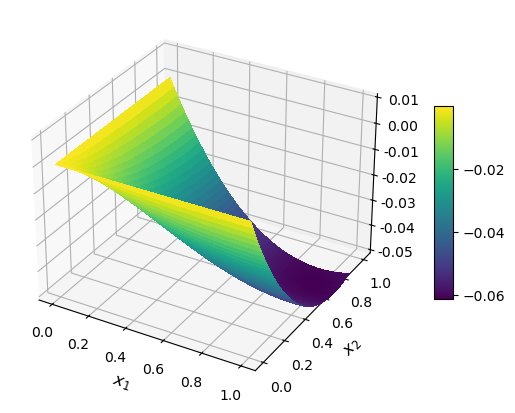

In [6]:
# Plot of I
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,5))

# Plot the surface.
surf = ax.plot_surface(xv, yv, I_at_Mesh, linewidth=0, cmap=cm.viridis, antialiased=False)
ax.set_zlim(-0.05, 0.01)
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)
#ax.view_init(azim=40, elev=45)

ax.set_xlabel('$x_1$', fontsize=12)
ax.set_ylabel('$x_2$', fontsize=12)

plt.show()

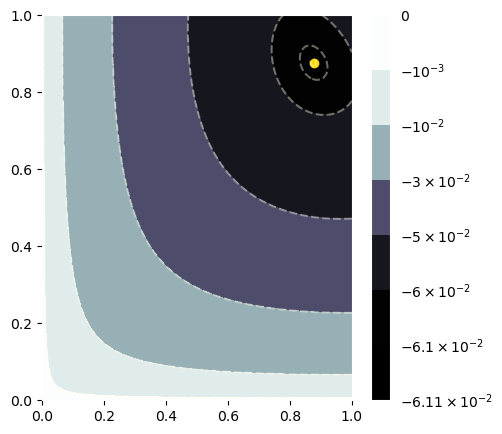

In [7]:
# Contour plot

ℓ = np.sort(-np.asarray([0.0, 1e-3, 1e-2, 3e-2, 5e-2, 6e-2, 6.1e-2, 6.111e-2]))

fig, ax = plt.subplots(ncols=1, figsize=(5, 5))

cp = ax.contourf(xv, yv, I_at_Mesh, ℓ, cmap=cm.bone, antialiased=False)
ax.contour(cp, colors='#FFFFE6', alpha= 0.4)                                  # Contour plot
cb = fig.colorbar(cp, shrink=1, format='%.3f')

cb_ticks = [    plt.Text(1, 0.06111, '$\\mathdefault{-6.11 \\times 10^{-2}}$' ),
                plt.Text(1, 0.061, '$\\mathdefault{-6.1 \\times 10^{-2}}$' ),
                plt.Text(1, 0.06, '$\\mathdefault{-6 \\times 10^{-2}}$' ),
                plt.Text(1, 0.05, '$\\mathdefault{-5 \\times 10^{-2}}$' ),
                plt.Text(1, 0.03, '$\\mathdefault{-3 \\times 10^{-2}}$' ),
                plt.Text(1, -0.01, '$\\mathdefault{-10^{-2}}$' ), 
                plt.Text(1, -0.001, '$\\mathdefault{-10^{-3}}$' ), 
                plt.Text(1, 0, '0' ),
           ]
cb.ax.set_yticklabels(cb_ticks)
cb.ax.yaxis.set_tick_params(color='white')
cb.outline.set_edgecolor('white')

plt.rcParams['font.family'] = 'cmr10'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['axes.unicode_minus'] = False

plt.scatter(0.8764,0.8764, c='gold', marker = 'o')

# set imshow outline
for spine in cp.axes.spines.values():
    spine.set_edgecolor('white')


# –––––––– Store –––––––– #
#fig.savefig('CH_Contour_I.pdf', bbox_inches='tight', pad_inches=0)
#ax.set_box_aspect(1)

/var/folders/1g/8szp6jr52h1byl43_1lx7zlm0000gn/T/ipykernel_12364/2421968394.py:5: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(ncols=1, figsize=(3,3))
/var/folders/1g/8szp6jr52h1byl43_1lx7zlm0000gn/T/ipykernel_12364/2421968394.py:9: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  cb = fig.colorbar(cp, shrink=1, format='%.3f')


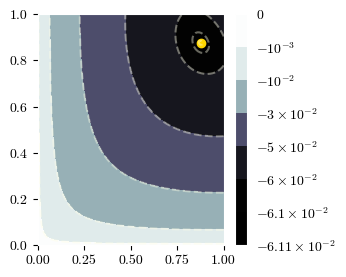

In [9]:
# Contour plot

ℓ = np.sort(-np.asarray([0.0, 1e-3, 1e-2, 3e-2, 5e-2, 6e-2, 6.1e-2, 6.111e-2]))

fig, ax = plt.subplots(ncols=1, figsize=(3,3))

cp = ax.contourf(xv, yv, I_at_Mesh, ℓ, cmap=cm.bone, antialiased=False)
ax.contour(cp, colors='#FFFFE6', alpha= 0.4)                                  # Contour plot
cb = fig.colorbar(cp, shrink=1, format='%.3f')

cb_ticks = [    plt.Text(1, 0.06111, '$\\mathdefault{-6.11 \\times 10^{-2}}$' ),
                plt.Text(1, 0.061, '$\\mathdefault{-6.1 \\times 10^{-2}}$' ),
                plt.Text(1, 0.06, '$\\mathdefault{-6 \\times 10^{-2}}$' ),
                plt.Text(1, 0.05, '$\\mathdefault{-5 \\times 10^{-2}}$' ),
                plt.Text(1, 0.03, '$\\mathdefault{-3 \\times 10^{-2}}$' ),
                plt.Text(1, -0.01, '$\\mathdefault{-10^{-2}}$' ), 
                plt.Text(1, -0.001, '$\\mathdefault{-10^{-3}}$' ), 
                plt.Text(1, 0, '0' ),
           ]
cb.ax.set_yticklabels(cb_ticks)
cb.ax.yaxis.set_tick_params(color='white')
cb.outline.set_edgecolor('white')

plt.rcParams['font.family'] = 'cmr10'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['axes.unicode_minus'] = False

plt.scatter(0.8764,0.8764, c='gold', marker = 'o')

# set imshow outline
for spine in cp.axes.spines.values():
    spine.set_edgecolor('white')


# –––––––– Store –––––––– #
fig.savefig('CH_Contour_Ib.pdf', bbox_inches='tight', pad_inches=0)
#ax.set_box_aspect(1)

In [8]:
plt.rcParams['font.family'] = 'cmr10'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['axes.unicode_minus'] = False

In [8]:
K = lambda y_1, y_2, x_1, x_2: np.log( (x_1 - y_1)** 2 + (x_2 - y_2)** 2) * 0.25 /π
K = lambda y_1, y_2: np.log( (y_1)** 2 + (y_2)** 2) * 0.25 /π

Let's do a quick silly test:

In [9]:
ε_q = 1e-15        # Quadrature radius around the origin
-abs(dblquad(K, ε_q, 1, ε_q, 1, epsabs=1e-8)[0] - Conv_I([1,1]))/Conv_I([1,1])

array([8.64792319e-15])

Some wee tests:

In [10]:
# Pointwise tests
x = [0.5,0.5]
PoI = Conv_I([x[0], x[1]])
print([x[0], x[1]], abs((dblquad(K, ε_q, x[0], ε_q, x[1], epsabs=1e-8)[0] - PoI)/PoI).item())

x = [1,1];    PoI = Conv_I([x[0], x[1]])
print([x[0], x[1]], abs((dblquad(K, ε_q, x[0], ε_q, x[1], epsabs=1e-8)[0] - PoI)/PoI).item())

x = [0.73,0.34];    PoI = Conv_I([x[0], x[1]])
print([x[0], x[1]], abs((dblquad(K, ε_q, x[0], ε_q, x[1], epsabs=1e-8)[0] - PoI)/PoI).item())

x = [0.05,0.86];    PoI = Conv_I([x[0], x[1]])
print([x[0], x[1]], abs((dblquad(K, ε_q, x[0], ε_q, x[1], epsabs=1e-8)[0] - PoI)/PoI).item())

x = [0.22,0.31];    PoI = Conv_I([x[0], x[1]])
print([x[0], x[1]], abs((dblquad(K, ε_q, x[0], ε_q, x[1], epsabs=1e-8)[0] - PoI)/PoI).item())

x = [0.66,0.81];    PoI = Conv_I([x[0], x[1]])
print([x[0], x[1]], abs((dblquad(K, ε_q, x[0], ε_q, x[1], epsabs=1e-8)[0] - PoI)/PoI).item())

[0.5, 0.5] 9.367372224710437e-15
[1, 1] 8.64792318588296e-15
[0.73, 0.34] 7.495139683641714e-15
[0.05, 0.86] 2.040258431900869e-14
[0.22, 0.31] 6.981331842355054e-15
[0.66, 0.81] 1.2441152134360337e-14


In [11]:
All_Ints_I = np.asarray([dblquad(K, ε_q, Points[0,i], ε_q, Points[1,i], epsabs=1e-8)[0] for i in range(100**2)]).reshape(100,100)

/var/folders/1g/8szp6jr52h1byl43_1lx7zlm0000gn/T/ipykernel_45022/4210688425.py:2: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,5))
/var/folders/1g/8szp6jr52h1byl43_1lx7zlm0000gn/T/ipykernel_45022/4210688425.py:11: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig.colorbar(surf, shrink=0.5, aspect=10)


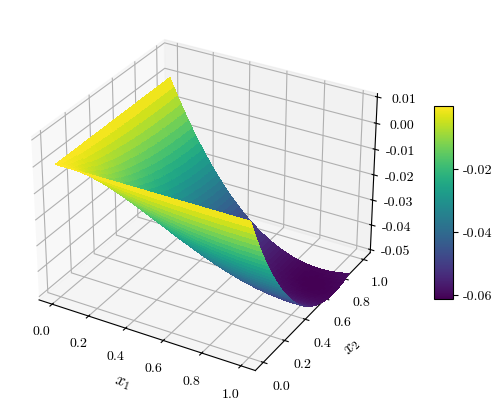

In [12]:
# Plot of I
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,5))

# Plot the surface.
surf = ax.plot_surface(xv, yv, All_Ints_I, linewidth=0, cmap=cm.viridis, antialiased=False)
ax.set_zlim(-0.05, 0.01)
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)
#ax.view_init(azim=40, elev=45)

ax.set_xlabel('$x_1$', fontsize=12)
ax.set_ylabel('$x_2$', fontsize=12)

plt.show()

We can compute the approximation error:

In [13]:
import matplotlib.ticker as mticker
# My axis should display 10⁻¹ but you can switch to e-notation 1.00e+01
def log_tick_formatter(val, pos=None):
    return f"$10^{{{int(val)}}}$"  # remove int() if you don't use MaxNLocator
    # return f"{10**val:.2e}"      # e-Notation

/var/folders/1g/8szp6jr52h1byl43_1lx7zlm0000gn/T/ipykernel_45022/4132792116.py:2: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,5))
/var/folders/1g/8szp6jr52h1byl43_1lx7zlm0000gn/T/ipykernel_45022/4132792116.py:5: RuntimeWarning: divide by zero encountered in log10
  surf = ax.plot_surface(xv, yv, np.clip(np.log10( abs(I_at_Mesh - All_Ints_I) ), -18, 1), linewidth=0, cmap=cm.viridis, antialiased=False)
/var/folders/1g/8szp6jr52h1byl43_1lx7zlm0000gn/T/ipykernel_45022/4132792116.py:12: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig.colorbar(surf, shrink=0.5, aspect=10)


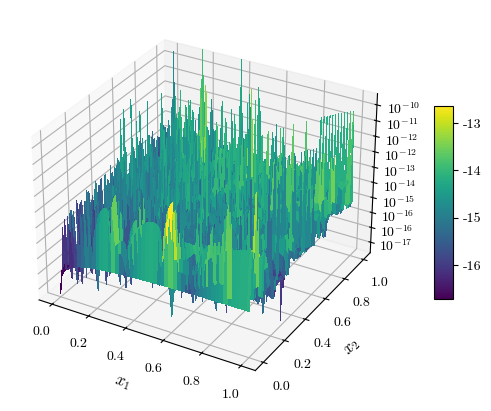

In [14]:
# Plot of Errors
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,5))

# Plot the surface.
surf = ax.plot_surface(xv, yv, np.clip(np.log10( abs(I_at_Mesh - All_Ints_I) ), -18, 1), linewidth=0, cmap=cm.viridis, antialiased=False)
ax.set_zlim(-18, -10)
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')


# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)
#ax.view_init(azim=40, elev=45)
ax.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.zaxis.set_major_locator(mticker.MaxNLocator(integer=False))

ax.set_xlabel('$x_1$', fontsize=12)
ax.set_ylabel('$x_2$', fontsize=12)

plt.show()

---

## Domain convolution $\mathsf{J}$

Now let's compute
\begin{align*}
    \mathsf{J}(x) = \IK(x_1,x_2) + \IK(x_1,1-x_2) + \IK(1-x_1,x_2) + \IK(1-x_1, 1-x_2).
\end{align*}

In [26]:
Shift_1 = np.zeros_like(Points);    Shift_1[0,:].fill(1)
Shift_2 = np.zeros_like(Points);    Shift_2[1,:].fill(1)
Shift_3 = np.ones_like(Points)

In [27]:
J_at_Mesh = I_at_Mesh + (Conv_I(abs(Points - Shift_1)) + Conv_I(abs(Points - Shift_2)) + Conv_I(abs(Points - Shift_3))).reshape(100,100)

/var/folders/1g/8szp6jr52h1byl43_1lx7zlm0000gn/T/ipykernel_45022/3692148570.py:2: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,5))
/var/folders/1g/8szp6jr52h1byl43_1lx7zlm0000gn/T/ipykernel_45022/3692148570.py:11: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig.colorbar(surf, shrink=0.5, aspect=10)


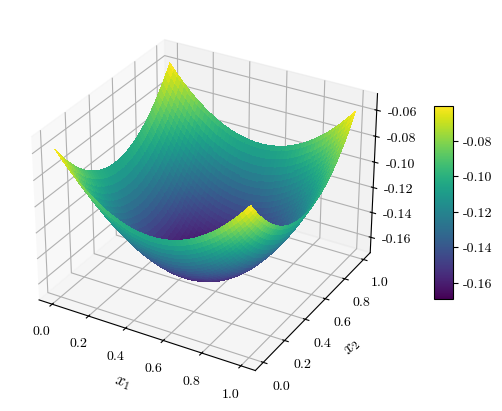

In [28]:
# Plot of J
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,5))

# Plot the surface.
surf = ax.plot_surface(xv, yv, J_at_Mesh, linewidth=0, cmap=cm.viridis, antialiased=False)
ax.set_zlim(-0.17, -0.05)
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)
#ax.view_init(azim=40, elev=45)

ax.set_xlabel('$x_1$', fontsize=12)
ax.set_ylabel('$x_2$', fontsize=12)

plt.show()

/var/folders/1g/8szp6jr52h1byl43_1lx7zlm0000gn/T/ipykernel_45022/77634686.py:5: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(ncols=1, figsize=(3, 3))
/var/folders/1g/8szp6jr52h1byl43_1lx7zlm0000gn/T/ipykernel_45022/77634686.py:9: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  cb = fig.colorbar(cp, shrink=1, format='%.3f')


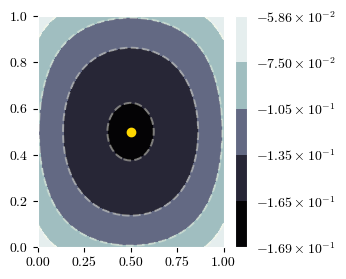

In [45]:
# Contour plot

ℓ = np.sort(-np.asarray([5.86e-2, 7.5e-2, 1.05e-1, 1.35e-1, 1.65e-1, 1.69e-1]))

fig, ax = plt.subplots(ncols=1, figsize=(3, 3))

cp = ax.contourf(xv, yv, J_at_Mesh, ℓ, cmap=cm.bone, antialiased=False)
ax.contour(cp, colors='#FFFFE6', alpha= 0.4)                                  # Contour plot
cb = fig.colorbar(cp, shrink=1, format='%.3f')

cb_ticks = [    plt.Text(1, -0.169, '$\\mathdefault{-1.69 \\times 10^{-1}}$' ),
                plt.Text(1, -0.165, '$\\mathdefault{-1.65 \\times 10^{-1}}$' ),
                plt.Text(1, -0.135, '$\\mathdefault{-1.35 \\times 10^{-1}}$' ),
                plt.Text(1, -0.105, '$\\mathdefault{-1.05 \\times 10^{-1}}$' ),
                plt.Text(1, -0.075, '$\\mathdefault{-7.50 \\times 10^{-2}}$' ),
                plt.Text(1, -0.059, '$\\mathdefault{-5.86 \\times 10^{-2}}$' ),
           ]
cb.ax.set_yticklabels(cb_ticks)
cb.ax.yaxis.set_tick_params(color='white')
cb.outline.set_edgecolor('white')

plt.rcParams['font.family'] = 'cmr10'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['axes.unicode_minus'] = False

plt.scatter(0.5,0.5, c='gold', marker = 'o')

# set imshow outline
for spine in cp.axes.spines.values():
    spine.set_edgecolor('white')



    
# –––––––– Store –––––––– #
#fig.savefig('CH_Contour_J.pdf', bbox_inches='tight', pad_inches=0)
#ax.set_box_aspect(1)

In [46]:
K = lambda y_1, y_2, x_1, x_2: np.log( (x_1 - y_1)** 2 + (x_2 - y_2)** 2) * 0.25 /π
#K = lambda y_1, y_2: np.log( (y_1)** 2 + (y_2)** 2) * 0.25 /π

Let's do a quick silly test:

In [47]:
Conv_I([1,1]) + Conv_I([1,1-1]) + Conv_I([1-1,1]) + Conv_I([1-1,1-1])

array([-0.05857351])

In [48]:
ε_q = 1e-15        # Quadrature radius around the origin
-abs(dblquad(K, ε_q, 1, ε_q, 1, args = (1,1), epsabs=1e-8)[0] - Conv_I([1,1]))/Conv_I([1,1])

array([1.89543522e-15])

In [54]:
# Approximate the L^1 norm of K in Ξ
K_Ξ = lambda y_1, y_2: np.abs(np.log( (y_1)** 2 + (y_2)** 2) * 0.25 /π)
4*dblquad(K_Ξ, ε_q, 1, ε_q, 1, epsabs=1e-8)[0]

0.2657059378886739

Some wee tests:

In [55]:
# Pointwise tests
x = [0.5,0.5]
PoI = Conv_I([x[0], x[1]]) + Conv_I([x[0], 1-x[1]]) + Conv_I([1-x[0], x[1]]) + Conv_I([1-x[0], 1-x[1]])
print([x[0], x[1]], abs((dblquad(K, ε_q, 1.0, ε_q, 1.0, args = (x[0], x[1]), epsabs=1e-8)[0] - PoI)/PoI).item())

x = [1,1];    PoI = Conv_I([x[0], x[1]]) + Conv_I([x[0], 1-x[1]]) + Conv_I([1-x[0], x[1]]) + Conv_I([1-x[0], 1-x[1]])
print([x[0], x[1]], abs((dblquad(K, ε_q, 1.0, ε_q, 1.0, args = (x[0], x[1]), epsabs=1e-8)[0] - PoI)/PoI).item())

x = [0.73,0.34];    PoI = Conv_I([x[0], x[1]]) + Conv_I([x[0], 1-x[1]]) + Conv_I([1-x[0], x[1]]) + Conv_I([1-x[0], 1-x[1]])
print([x[0], x[1]], abs((dblquad(K, ε_q, 1.0, ε_q, 1.0, args = (x[0], x[1]), epsabs=1e-10, epsrel=1e-15)[0] - PoI)/PoI).item())

x = [0.05,0.86];    PoI = Conv_I([x[0], x[1]]) + Conv_I([x[0], 1-x[1]]) + Conv_I([1-x[0], x[1]]) + Conv_I([1-x[0], 1-x[1]])
print([x[0], x[1]], abs((dblquad(K, ε_q, 1.0, ε_q, 1.0, args = (x[0], x[1]), epsabs=1e-10, epsrel=1e-15)[0] - PoI)/PoI).item())

x = [0.22,0.31];    PoI = Conv_I([x[0], x[1]]) + Conv_I([x[0], 1-x[1]]) + Conv_I([1-x[0], x[1]]) + Conv_I([1-x[0], 1-x[1]])
print([x[0], x[1]], abs((dblquad(K, ε_q, 1.0, ε_q, 1.0, args = (x[0], x[1]), epsabs=1e-10, epsrel=1e-15)[0] - PoI)/PoI).item())

x = [0.66,0.81];    PoI = Conv_I([x[0], x[1]]) + Conv_I([x[0], 1-x[1]]) + Conv_I([1-x[0], x[1]]) + Conv_I([1-x[0], 1-x[1]])
print([x[0], x[1]], abs((dblquad(K, ε_q, 1.0, ε_q, 1.0, args = (x[0], x[1]), epsabs=1e-10, epsrel=1e-15)[0] - PoI)/PoI).item())

[0.5, 0.5] 2.6294378174625788e-15
[1, 1] 1.8954352188236624e-15
[0.73, 0.34] 9.467555533082339e-14
[0.05, 0.86] 5.54860243469452e-12
[0.22, 0.31] 2.366000653801452e-14
[0.66, 0.81] 2.5610302802125945e-14


In [56]:
start = time.time()
All_Ints_J = np.asarray([dblquad(K, ε_q, 1.0, ε_q, 1.0, args = (Points[0,i],Points[1,i]), epsabs=1e-4)[0] for i in range(100**2)]).reshape(100,100)
end = time.time()
print('{0:0.2f}'.format(end-start))

136.65


/var/folders/1g/8szp6jr52h1byl43_1lx7zlm0000gn/T/ipykernel_45022/570971097.py:2: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,5))
/var/folders/1g/8szp6jr52h1byl43_1lx7zlm0000gn/T/ipykernel_45022/570971097.py:11: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig.colorbar(surf, shrink=0.5, aspect=10)


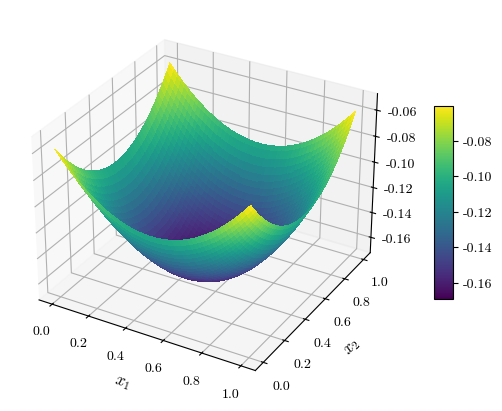

In [57]:
# Plot of J
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,5))

# Plot the surface.
surf = ax.plot_surface(xv, yv, All_Ints_J, linewidth=0, cmap=cm.viridis, antialiased=False)
ax.set_zlim(-0.17, -0.05)
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)
#ax.view_init(azim=40, elev=45)

ax.set_xlabel('$x_1$', fontsize=12)
ax.set_ylabel('$x_2$', fontsize=12)

plt.show()

We can compute the approximation error:

/var/folders/1g/8szp6jr52h1byl43_1lx7zlm0000gn/T/ipykernel_45022/2769164792.py:2: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,5))
/var/folders/1g/8szp6jr52h1byl43_1lx7zlm0000gn/T/ipykernel_45022/2769164792.py:12: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig.colorbar(surf, shrink=0.5, aspect=10)


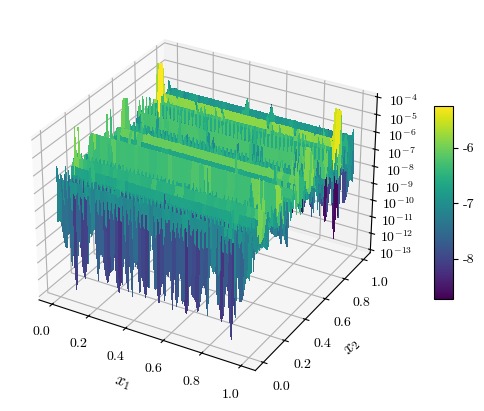

In [58]:
# Plot of Errors
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,5))

# Plot the surface.
surf = ax.plot_surface(xv, yv, np.clip(np.log10( abs(J_at_Mesh - All_Ints_J) ), -13, 1), linewidth=0, cmap=cm.viridis, antialiased=False)
ax.set_zlim(-13, -4)
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')


# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)
#ax.view_init(azim=40, elev=45)
ax.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.zaxis.set_major_locator(mticker.MaxNLocator(integer=False))

ax.set_xlabel('$x_1$', fontsize=12)
ax.set_ylabel('$x_2$', fontsize=12)

plt.show()

In [59]:
start = time.time()
All_Ints_J = np.asarray([dblquad(K, ε_q, 1.0, ε_q, 1.0, args = (Points[0,i],Points[1,i]), epsabs=1e-5)[0] for i in range(100**2)]).reshape(100,100)
end = time.time()
print('{0:0.2f}'.format(end-start))

237.78


/var/folders/1g/8szp6jr52h1byl43_1lx7zlm0000gn/T/ipykernel_45022/3376254668.py:2: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,5))
/var/folders/1g/8szp6jr52h1byl43_1lx7zlm0000gn/T/ipykernel_45022/3376254668.py:12: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig.colorbar(surf, shrink=0.5, aspect=10)


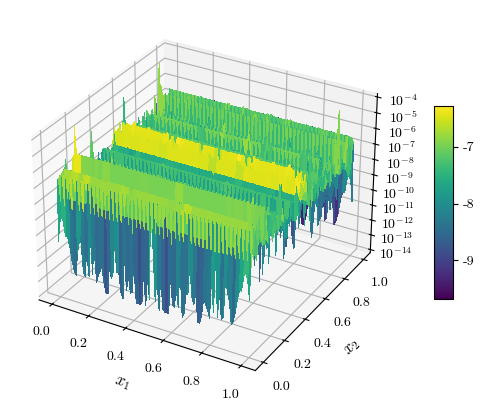

In [60]:
# Plot of Errors
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,5))

# Plot the surface.
surf = ax.plot_surface(xv, yv, np.clip(np.log10( abs(J_at_Mesh - All_Ints_J) ), -13, 1), linewidth=0, cmap=cm.viridis, antialiased=False)
ax.set_zlim(-14, -4)
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')


# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)
#ax.view_init(azim=40, elev=45)
ax.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.zaxis.set_major_locator(mticker.MaxNLocator(integer=False))

ax.set_xlabel('$x_1$', fontsize=12)
ax.set_ylabel('$x_2$', fontsize=12)

plt.show()

In [108]:
ε_q = 1e-45        # Quadrature radius around the origin
start = time.time()
All_Ints_J = np.asarray([dblquad(K, ε_q, 1.0, ε_q, 1.0, args = (Points[0,i],Points[1,i]), epsabs=1e-8)[0] for i in range(100**2)]).reshape(100,100)
end = time.time()
print('{0:0.2f}'.format(end-start))

875.06


/var/folders/1g/8szp6jr52h1byl43_1lx7zlm0000gn/T/ipykernel_18526/3014965569.py:5: RuntimeWarning: divide by zero encountered in log10
  surf = ax.plot_surface(xv, yv, np.clip(np.log10( abs(J_at_Mesh - All_Ints_J) ), -17, 1), linewidth=0, cmap=cm.viridis, antialiased=False)


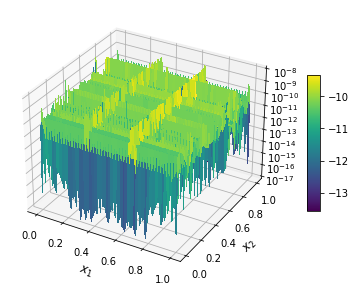

In [113]:
# Plot of Errors
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,5))

# Plot the surface.
surf = ax.plot_surface(xv, yv, np.clip(np.log10( abs(J_at_Mesh - All_Ints_J) ), -17, 1), linewidth=0, cmap=cm.viridis, antialiased=False)
ax.set_zlim(-17, -8)
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')


# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)
#ax.view_init(azim=40, elev=45)
ax.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.zaxis.set_major_locator(mticker.MaxNLocator(integer=False))

ax.set_xlabel('$x_1$', fontsize=12)
ax.set_ylabel('$x_2$', fontsize=12)

plt.show()

In [124]:
print( '{0:.2e}'.format( (abs(J_at_Mesh - All_Ints_J)/abs(J_at_Mesh)).max() ) )

5.61e-08


---

## Sub patch $\mathsf{G}$

Now let's compute
\begin{align*}
    \mathsf{G}(x) = \IK_{( \min\{x_1,\varepsilon\} , \min\{x_2,\varepsilon\} )} + \IK_{( \min\{x_1,\varepsilon\}, \min\{1-x_2, \varepsilon\})} + \IK_{( \min\{1-x_1, \varepsilon\}, \min\{x_2,\varepsilon\} )} + \IK_{( \min\{1-x_1, \varepsilon\}, \min\{1-x_2, \varepsilon\} )}
\end{align*}

For these tests, $\varepsilon \leq \frac{1}{2}$, as a result, the minimum is
\begin{align*}
    \mathsf{G}(0.5,0.5) = \IK_{( \min\{0.5,\varepsilon\} , \min\{0.5,\varepsilon\} )} + \IK_{( \min\{0.5,\varepsilon\}, \min\{0.5, \varepsilon\})} + \IK_{( \min\{0.5, \varepsilon\}, \min\{0.5,\varepsilon\} )} + \IK_{( \min\{0.5, \varepsilon\}, \min\{0.5, \varepsilon\} )}
    = 4\IK( \varepsilon, \varepsilon)
\end{align*}

In [62]:
def forward(a):    return -np.log(1.002/(a+0.001) - 1)
def inverse(a):    return (1001 * np.exp(a) - 1) / (1000 *( np.exp(a) + 1 ) )

In [63]:
# Generate points with higher concentration at the extremes
ψ = 5e-3
nodes = np.r_[ψ * (np.r_[-1,np.polynomial.chebyshev.chebpts1(38),1]/2 + 0.5), 1 - ψ * (np.r_[-1,np.polynomial.chebyshev.chebpts1(38),1]/2 + 0.5)]
nodes = np.r_[(1-2*ψ) * (np.polynomial.chebyshev.chebpts1(20)/2 + 0.5) + ψ, nodes]
nodes.sort()

In [64]:
nodes.size

100

In [65]:
X, Y = np.meshgrid(nodes, nodes)
PoIS = np.vstack([X.ravel(), Y.ravel()])

Plot under adaptive scaling, previous mesh, and some additional styling:

In [66]:
def forward(a):
    s = ε**1;    t = 2 * s
    return -np.log( (1+t)/(a+s) - 1)
def inverse(a):    
    s = ε**1;    t = 2 * s
    return (t+1) * np.exp(a) / ( np.exp(a) + 1 )   -  s

In [70]:
[(t**2 * (4 * np.log(t) - 6 + 2 * np.log(2) + np.pi)) / (2 * np.pi) for t in [1e-1,1e-2,1e-3,1e-4,1e-5,1e-6,1e-7]]

[-0.01700165256157576,
 -0.0003166036453916431,
 -4.631907651675287e-06,
 -6.097778849434143e-08,
 -7.563650047192999e-10,
 -9.029521244951854e-12,
 -1.0495392442710706e-13]

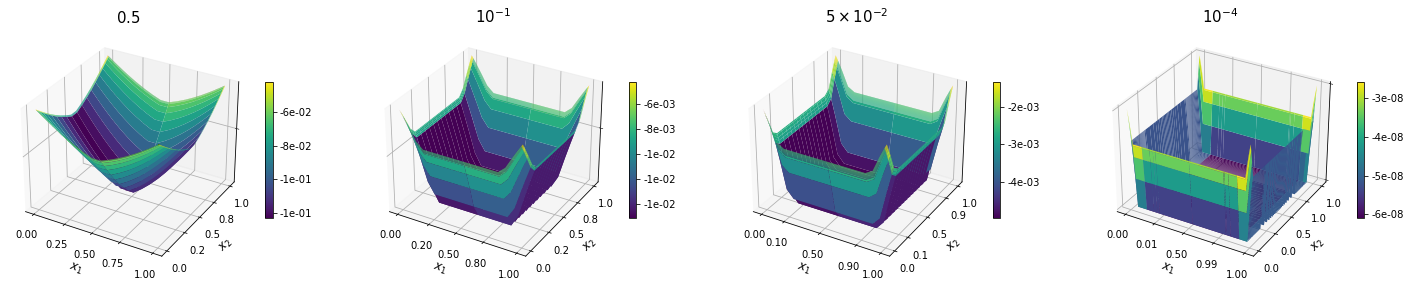

In [153]:
# Plot of G
fig, ax = plt.subplots(1,4, subplot_kw={"projection": "3d"}, figsize=(25,5))

Vals_ε = [0.5, 0.1, 0.05, 1e-4]
Titles = [r'$0.5$',r'$10^{-1}$',r'$5 \times 10^{-2}$',r'$10^{-4}$']
# Plot the surface
for i in range(4):
    ε = Vals_ε[i]
    
    # Compute values at mesh
    G_at_Mesh = (Conv_I( np.minimum(PoIS,ε)) + Conv_I( np.minimum(abs(PoIS - Shift_1),ε) ) + 
             Conv_I( np.minimum(abs(PoIS - Shift_2),ε) ) + Conv_I( np.minimum(abs(PoIS - Shift_3),ε) )).reshape(100,100)
    
    # Compute limits
    MaxG = Conv_I([ε,ε]).item() #float(I.subs({y_2:y_1}).subs(y_1,ε̂).simplify().subs(ε̂,ε).evalf())
    MinG = 4 * Conv_I([ε,ε]).item() #float(I.subs({y_2:y_1}).subs(y_1,ε̂).simplify().subs(ε̂,ε).evalf())
    #lim_inf = np.rint((MinG * 10**-np.floor(np.log10(-MinG)) - 0)) * 10**np.floor(np.log10(-MinG))
    #lim_sup = np.rint((MaxG * 10**-np.floor(np.log10(-MaxG)) + 1)) * 10**np.floor(np.log10(-MaxG))
    
    surf = ax[i].plot_surface(forward(X), forward(Y), G_at_Mesh, linewidth=0, cmap=cm.viridis, antialiased=True, rstride=1)
    ax[i].set_zlim(MinG, MaxG)
    fig.colorbar(surf, shrink=0.5, aspect=18, pad = 0.05, format='%.0e')    # Add a color bar which maps values to colors.
    ax[i].set_title(Titles[i], fontsize=15)
    ax[i].zaxis._set_scale('symlog', linthresh=1e-3)

it = 0
Tickers = np.asarray([[0, 0.25, 0.5, 0.75, 1],[0, 0.2, 0.5, 0.8, 1],[0, 0.1, 0.5, 0.9, 1],[0, 0.01, 0.5, 0.99, 1]])
for axis in ax:    
    ε = Vals_ε[it]
    axis.set_xlabel(r'$x_1$', fontsize=12);    axis.set_ylabel(r'$x_2$', fontsize=12)
    '''
    Fix labels
    '''
    New_Ticks = forward( Tickers[it] )
    axis.set_xticks( New_Ticks );    axis.set_yticks( New_Ticks )
    base_range = Tickers[it] #inverse(axis.get_xticks())
    axis.set_xticklabels([f'{a:.2f}' for a in base_range]);    axis.set_yticklabels([f'{a:.1f}' for a in base_range])
    axis.set_zticks([])
    
    it += 1

plt.show()

Hence we obtain (also using radial symmetry):
\begin{align*}
    \mathsf{G}(x) &= \int\limits_{x_2 - d}^{x_2 - c} \int\limits_{x_1-b}^{x_1 - a} K (u) \dif u 
    \quad = \int\limits_{-\min\{1-x_2, \varepsilon\}}^{ \min\{x_2,\varepsilon\} } \,\, \int\limits_{-\min\{1-x_1, \varepsilon\}}^{ \min\{x_1,\varepsilon\} } K (u) \dif u 
    \\
    &=
    \bigg[
        \int\limits_{0}^{ \min\{x_2,\varepsilon\} } \int\limits_{0}^{ \min\{x_1,\varepsilon\} } 
        +
        \int\limits_{0}^{\min\{1-x_2, \varepsilon\}} \int\limits_{0}^{ \min\{x_1,\varepsilon\} }
        +
        \int\limits_{0}^{ \min\{x_2,\varepsilon\} } \,\, \int\limits_{0}^{\min\{1-x_1, \varepsilon\}}
        +
        \int\limits_{0}^{\min\{1-x_2, \varepsilon\}} \int\limits_{0}^{\min\{1-x_1, \varepsilon\}}
    \bigg]
    K (u) \dif u
    \\
    &= 
    \begin{cases}
        \IK_{( \min\{x_1,\varepsilon\} , \min\{x_2,\varepsilon\} )} + \IK_{( \min\{x_1,\varepsilon\}, \min\{1-x_2, \varepsilon\})} + \IK_{( \min\{1-x_1, \varepsilon\}, \min\{x_2,\varepsilon\} )} + \IK_{( \min\{1-x_1, \varepsilon\}, \min\{1-x_2, \varepsilon\} )}
        & \text{if } x \in (0,1)^2,
            \\
        \IK_{(\varepsilon, \min\{x_2,\varepsilon\})} + \IK_{ (\varepsilon, \min\{1-x_2, \varepsilon\}) }   & \text{if } x_1 \in \{0,1\} \text{ and } x_2 \in (0,1),
        \\
        \IK_{(\min\{x_1,\varepsilon\},\varepsilon)} + \IK_{ (\min\{1-x_1, \varepsilon\},\varepsilon) }   & \text{if } x_1 \in (0,1) \text{ and } x_2 \in \{0,1\},
        \\
        (8\pi)^{-1} \varepsilon^{2} \big[ -6 + \log 4 + \pi + 4\log (\varepsilon^2) \big] & \text{if } x \in \big\{ (0,0), (0,1), (1,0), (1,1) \big\}.
    \end{cases}
\end{align*}

In [287]:
ε = 0.5
ε_q = 1e-25        # Quadrature radius around the origin
K = lambda y_1, y_2: np.log( (y_1)** 2 + (y_2)** 2) * 0.25 /π

In [288]:
def G_quad(x, ε = 0.5, epsabs = 1e-8):
    G  = dblquad(K, ε_q, min( x[1], ε), ε_q, min( x[0], ε), epsabs=epsabs)[0]
    G += dblquad(K, ε_q, min( 1-x[1], ε), ε_q, min( x[0], ε), epsabs=epsabs)[0] 
    G += dblquad(K, ε_q, min( x[1], ε), ε_q, min( 1-x[0], ε), epsabs=epsabs)[0] 
    G += dblquad(K, ε_q, min( 1-x[1], ε), ε_q, min( 1-x[0], ε), epsabs=epsabs)[0]
    return G

In [289]:
x = [1,1]
PoI = (Conv_I( np.minimum([x[0],x[1]],ε)) + Conv_I( np.minimum(abs( np.asarray([x[0]-1,x[1]]) ),ε) ) + 
             Conv_I( np.minimum(abs( np.asarray([x[0],x[1]-1]) ),ε) ) + Conv_I( np.minimum(abs( np.asarray([x[0]-1,x[1]-1]) ),ε) ))
PoI.item(), G_quad(x)

(-0.04222282866900148, -0.04222282866900136)

In [290]:
# Pointwise tests
x = [0.5,0.5]
PoI = (Conv_I( np.minimum([x[0],x[1]],ε)) + Conv_I( np.minimum(abs( np.asarray([x[0]-1,x[1]]) ),ε) ) + 
             Conv_I( np.minimum(abs( np.asarray([x[0],x[1]-1]) ),ε) ) + Conv_I( np.minimum(abs( np.asarray([x[0]-1,x[1]-1]) ),ε) ))
print([x[0], x[1]], '  {0:.4e} {1:.4e} {2:.4e}'.format(G_quad(x), PoI.item(), abs((G_quad(x) - PoI)/PoI).item()) )

x = [1,1];    PoI = (Conv_I( np.minimum([x[0],x[1]],ε)) + Conv_I( np.minimum(abs( np.asarray([x[0]-1,x[1]]) ),ε) ) + 
                     Conv_I( np.minimum(abs( np.asarray([x[0],x[1]-1]) ),ε) ) + Conv_I( np.minimum(abs( np.asarray([x[0]-1,x[1]-1]) ),ε) ))
print([x[0], x[1]], '      {0:.4e} {1:.4e} {2:.4e}'.format(G_quad(x), PoI.item(), abs((G_quad(x) - PoI)/PoI).item()) )

x = [0.73,0.34];    PoI = (Conv_I( np.minimum([x[0],x[1]],ε)) + Conv_I( np.minimum(abs( np.asarray([x[0]-1,x[1]]) ),ε) ) + 
                           Conv_I( np.minimum(abs( np.asarray([x[0],x[1]-1]) ),ε) ) + Conv_I( np.minimum(abs( np.asarray([x[0]-1,x[1]-1]) ),ε) ))
print([x[0], x[1]], '{0:.4e} {1:.4e} {2:.4e}'.format(G_quad(x), PoI.item(), abs((G_quad(x) - PoI)/PoI).item()) )

x = [0.05,0.86];    PoI = (Conv_I( np.minimum([x[0],x[1]],ε)) + Conv_I( np.minimum(abs( np.asarray([x[0]-1,x[1]]) ),ε) ) + 
                           Conv_I( np.minimum(abs( np.asarray([x[0],x[1]-1]) ),ε) ) + Conv_I( np.minimum(abs( np.asarray([x[0]-1,x[1]-1]) ),ε) ))
print([x[0], x[1]], '{0:.4e} {1:.4e} {2:.4e}'.format(G_quad(x), PoI.item(), abs((G_quad(x) - PoI)/PoI).item()) )

x = [0.22,0.31];    PoI = (Conv_I( np.minimum([x[0],x[1]],ε)) + Conv_I( np.minimum(abs( np.asarray([x[0]-1,x[1]]) ),ε) ) + 
                           Conv_I( np.minimum(abs( np.asarray([x[0],x[1]-1]) ),ε) ) + Conv_I( np.minimum(abs( np.asarray([x[0]-1,x[1]-1]) ),ε) ))
print([x[0], x[1]], '{0:.4e} {1:.4e} {2:.4e}'.format(G_quad(x), PoI.item(), abs((G_quad(x) - PoI)/PoI).item()) )

x = [0.66,0.81];    PoI = (Conv_I( np.minimum([x[0],x[1]],ε)) + Conv_I( np.minimum(abs( np.asarray([x[0]-1,x[1]]) ),ε) ) + 
                           Conv_I( np.minimum(abs( np.asarray([x[0],x[1]-1]) ),ε) ) + Conv_I( np.minimum(abs( np.asarray([x[0]-1,x[1]-1]) ),ε) ))
print([x[0], x[1]], '{0:.4e} {1:.4e} {2:.4e}'.format(G_quad(x), PoI.item(), abs((G_quad(x) - PoI)/PoI).item()) )
#print([x[0], x[1]], abs((dblquad(K, -min( 1-x[1], ε), min( x[1], ε), -min( 1-x[0], ε), min( x[0], ε), args = (0,0), epsabs=1e-8)[0] - PoI)/PoI).item())
#print([x[0], x[1]], abs((dblquad(K, max(ε_q, x[1]-ε), min(1, x[1]+ε), max(ε_q, x[0]-ε), min(1, x[0]+ε), args = (x[0],x[1]), epsabs=1e-8)[0] - PoI)/PoI).item())

[0.5, 0.5]   -1.6889e-01 -1.6889e-01 2.9581e-15
[1, 1]       -4.2223e-02 -4.2223e-02 2.9581e-15
[0.73, 0.34] -1.2658e-01 -1.2658e-01 8.8720e-13
[0.05, 0.86] -6.8227e-02 -6.8227e-02 9.5601e-15
[0.22, 0.31] -1.1604e-01 -1.1604e-01 1.0644e-14
[0.66, 0.81] -1.1441e-01 -1.1441e-01 1.1523e-14


In [303]:
All_Ints_G = np.zeros([4,100,100])

for i in range(4):
    ε = Vals_ε[i]
    start = time.time()
    All_Ints_G[i] = np.asarray([G_quad([PoIS[0,i],PoIS[1,i]], ε = ε, epsabs = 1e-4) for i in range(100**2)]).reshape(100,100)
    end = time.time()
    print('{0:.2e}: {1:0.2f}'.format(ε, end-start))

5.00e-01: 42.86
1.00e-01: 30.06
5.00e-02: 25.70
1.00e-04: 13.52


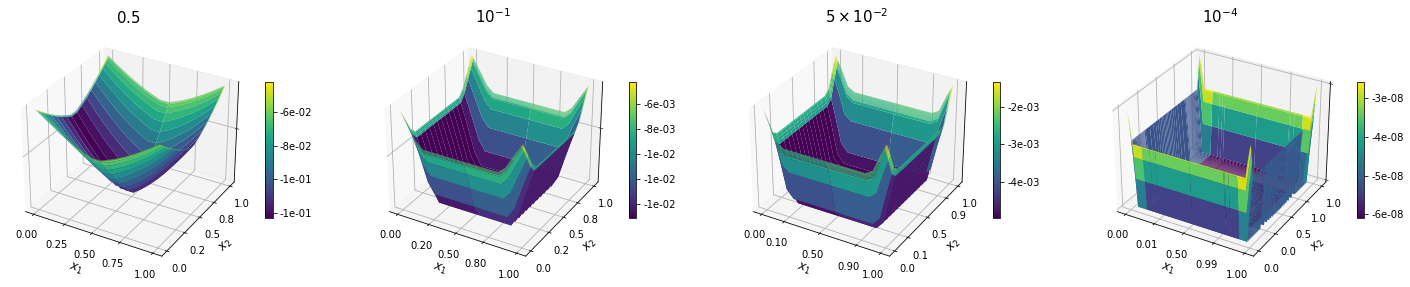

In [304]:
# Plot of G
fig, ax = plt.subplots(1,4, subplot_kw={"projection": "3d"}, figsize=(25,5))

Vals_ε = [0.5, 0.1, 0.05, 1e-4]
Titles = [r'$0.5$',r'$10^{-1}$',r'$5 \times 10^{-2}$',r'$10^{-4}$']
# Plot the surface
for i in range(4):
    ε = Vals_ε[i]
    
    # Compute values at mesh
    G_at_Mesh = (Conv_I( np.minimum(PoIS,ε)) + Conv_I( np.minimum(abs(PoIS - Shift_1),ε) ) + 
             Conv_I( np.minimum(abs(PoIS - Shift_2),ε) ) + Conv_I( np.minimum(abs(PoIS - Shift_3),ε) )).reshape(100,100)
    
    # Compute limits
    MaxG = Conv_I([ε,ε]).item() #float(I.subs({y_2:y_1}).subs(y_1,ε̂).simplify().subs(ε̂,ε).evalf())
    MinG = 4 * Conv_I([ε,ε]).item() #float(I.subs({y_2:y_1}).subs(y_1,ε̂).simplify().subs(ε̂,ε).evalf())
    #lim_inf = np.rint((MinG * 10**-np.floor(np.log10(-MinG)) - 0)) * 10**np.floor(np.log10(-MinG))
    #lim_sup = np.rint((MaxG * 10**-np.floor(np.log10(-MaxG)) + 1)) * 10**np.floor(np.log10(-MaxG))
    
    surf = ax[i].plot_surface(forward(X), forward(Y), All_Ints_G[i], linewidth=0, cmap=cm.viridis, antialiased=True, rstride=1)
    ax[i].set_zlim(MinG, MaxG)
    fig.colorbar(surf, shrink=0.5, aspect=18, pad = 0.05, format='%.0e')    # Add a color bar which maps values to colors.
    ax[i].set_title(Titles[i], fontsize=15)
    ax[i].zaxis._set_scale('symlog', linthresh=1e-3)

it = 0
Tickers = np.asarray([[0, 0.25, 0.5, 0.75, 1],[0, 0.2, 0.5, 0.8, 1],[0, 0.1, 0.5, 0.9, 1],[0, 0.01, 0.5, 0.99, 1]])
for axis in ax:    
    ε = Vals_ε[it]
    axis.set_xlabel(r'$x_1$', fontsize=12);    axis.set_ylabel(r'$x_2$', fontsize=12)
    '''
    Fix labels
    '''
    New_Ticks = forward( Tickers[it] )
    axis.set_xticks( New_Ticks );    axis.set_yticks( New_Ticks )
    base_range = Tickers[it] #inverse(axis.get_xticks())
    axis.set_xticklabels([f'{a:.2f}' for a in base_range]);    axis.set_yticklabels([f'{a:.1f}' for a in base_range])
    axis.set_zticks([])
    
    it += 1

plt.show()

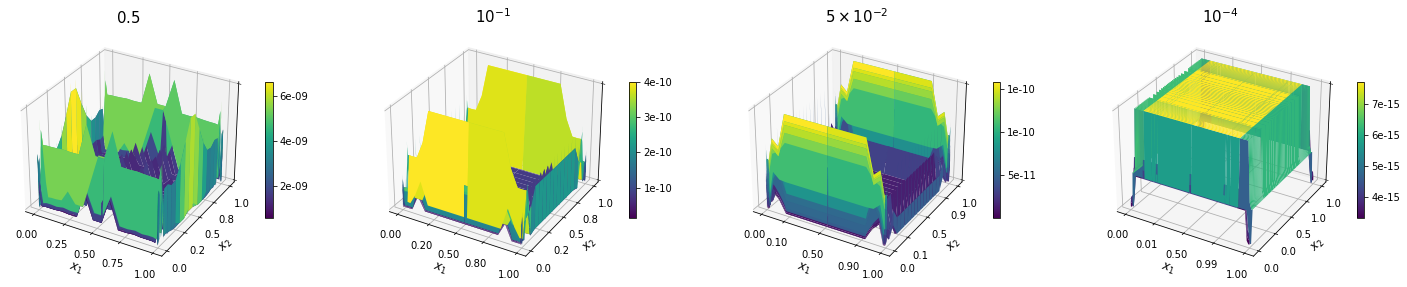

In [305]:
# Plot of G error
fig, ax = plt.subplots(1,4, subplot_kw={"projection": "3d"}, figsize=(25,5))

Vals_ε = [0.5, 0.1, 0.05, 1e-4]
Titles = [r'$0.5$',r'$10^{-1}$',r'$5 \times 10^{-2}$',r'$10^{-4}$']
# Plot the surface
for i in range(4):
    ε = Vals_ε[i]
    
    # Compute values at mesh
    G_at_Mesh = (Conv_I( np.minimum(PoIS,ε)) + Conv_I( np.minimum(abs(PoIS - Shift_1),ε) ) + 
             Conv_I( np.minimum(abs(PoIS - Shift_2),ε) ) + Conv_I( np.minimum(abs(PoIS - Shift_3),ε) )).reshape(100,100)
    
    # Compute limits
    MaxG = Conv_I([ε,ε]).item() #float(I.subs({y_2:y_1}).subs(y_1,ε̂).simplify().subs(ε̂,ε).evalf())
    MinG = 4 * Conv_I([ε,ε]).item() #float(I.subs({y_2:y_1}).subs(y_1,ε̂).simplify().subs(ε̂,ε).evalf())
    #lim_inf = np.rint((MinG * 10**-np.floor(np.log10(-MinG)) - 0)) * 10**np.floor(np.log10(-MinG))
    #lim_sup = np.rint((MaxG * 10**-np.floor(np.log10(-MaxG)) + 1)) * 10**np.floor(np.log10(-MaxG))
    
    surf = ax[i].plot_surface(forward(X), forward(Y), abs(G_at_Mesh-All_Ints_G[i]), linewidth=0, cmap=cm.viridis, antialiased=True, rstride=1)
    #ax[i].set_zlim(MinG, MaxG)
    fig.colorbar(surf, shrink=0.5, aspect=18, pad = 0.05, format='%.0e')    # Add a color bar which maps values to colors.
    ax[i].set_title(Titles[i], fontsize=15)
    ax[i].zaxis._set_scale('symlog', linthresh=1e-3)

it = 0
Tickers = np.asarray([[0, 0.25, 0.5, 0.75, 1],[0, 0.2, 0.5, 0.8, 1],[0, 0.1, 0.5, 0.9, 1],[0, 0.01, 0.5, 0.99, 1]])
for axis in ax:    
    ε = Vals_ε[it]
    axis.set_xlabel(r'$x_1$', fontsize=12);    axis.set_ylabel(r'$x_2$', fontsize=12)
    '''
    Fix labels
    '''
    New_Ticks = forward( Tickers[it] )
    axis.set_xticks( New_Ticks );    axis.set_yticks( New_Ticks )
    base_range = Tickers[it] #inverse(axis.get_xticks())
    axis.set_xticklabels([f'{a:.2f}' for a in base_range]);    axis.set_yticklabels([f'{a:.1f}' for a in base_range])
    axis.set_zticks([])
    
    it += 1

plt.show()

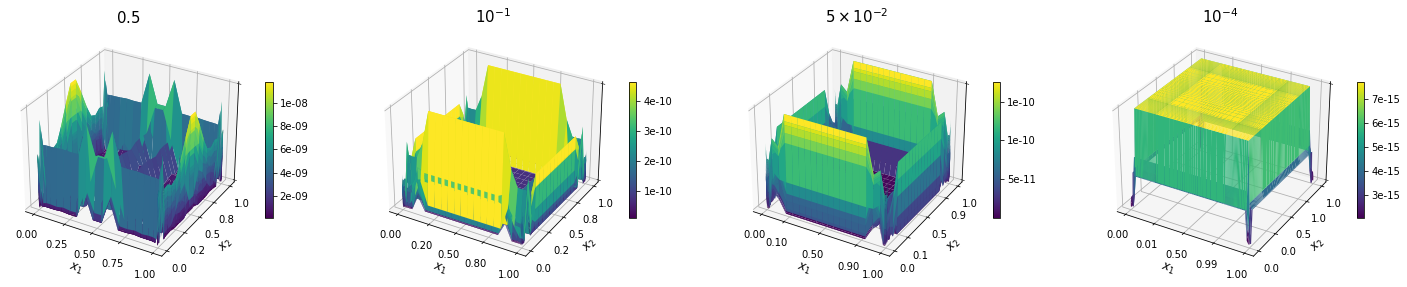

In [327]:
# Plot of G error finer
fig, ax = plt.subplots(1,4, subplot_kw={"projection": "3d"}, figsize=(25,5))

Vals_ε = [0.5, 0.1, 0.05, 1e-4]
Titles = [r'$0.5$',r'$10^{-1}$',r'$5 \times 10^{-2}$',r'$10^{-4}$']
# Plot the surface
for i in range(4):
    ε = Vals_ε[i]
    
    # Compute values at mesh
    G_at_Mesh = (Conv_I( np.minimum(PoIS,ε)) + Conv_I( np.minimum(abs(PoIS - Shift_1),ε) ) + 
             Conv_I( np.minimum(abs(PoIS - Shift_2),ε) ) + Conv_I( np.minimum(abs(PoIS - Shift_3),ε) )).reshape(100,100)
    
    # Compute limits
    MaxG = Conv_I([ε,ε]).item() #float(I.subs({y_2:y_1}).subs(y_1,ε̂).simplify().subs(ε̂,ε).evalf())
    MinG = 4 * Conv_I([ε,ε]).item() #float(I.subs({y_2:y_1}).subs(y_1,ε̂).simplify().subs(ε̂,ε).evalf())
    #lim_inf = np.rint((MinG * 10**-np.floor(np.log10(-MinG)) - 0)) * 10**np.floor(np.log10(-MinG))
    #lim_sup = np.rint((MaxG * 10**-np.floor(np.log10(-MaxG)) + 1)) * 10**np.floor(np.log10(-MaxG))
    
    surf = ax[i].plot_surface(forward(X), forward(Y), abs(G_at_Mesh-All_Ints_G[i]), linewidth=0, cmap=cm.viridis, antialiased=True, rstride=1, cstride=1)
    #ax[i].set_zlim(MinG-1e-8, MaxG)
    fig.colorbar(surf, shrink=0.5, aspect=18, pad = 0.05, format='%.0e')    # Add a color bar which maps values to colors.
    ax[i].set_title(Titles[i], fontsize=15)
    ax[i].zaxis._set_scale('symlog', linthresh=1e-3)

it = 0
Tickers = np.asarray([[0, 0.25, 0.5, 0.75, 1],[0, 0.2, 0.5, 0.8, 1],[0, 0.1, 0.5, 0.9, 1],[0, 0.01, 0.5, 0.99, 1]])
for axis in ax:    
    ε = Vals_ε[it]
    axis.set_xlabel(r'$x_1$', fontsize=12);    axis.set_ylabel(r'$x_2$', fontsize=12)
    '''
    Fix labels
    '''
    New_Ticks = forward( Tickers[it] )
    axis.set_xticks( New_Ticks );    axis.set_yticks( New_Ticks )
    base_range = Tickers[it] #inverse(axis.get_xticks())
    axis.set_xticklabels([f'{a:.2f}' for a in base_range]);    axis.set_yticklabels([f'{a:.1f}' for a in base_range])
    axis.set_zticks([])
    
    it += 1

plt.show()

---